# Lab 0.1: Data Exploration

## Step 1: Load Raw Data

In [29]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

# Import Data
inbound_df = pd.read_csv("./data/Inbound.csv")
inventory_df = pd.read_csv("./data/Inventory.csv")
material_master_df = pd.read_csv("./data/MaterialMaster.csv")
operation_cost_df = pd.read_csv("./data/OperationCost.csv")
outbound_df = pd.read_csv("./data/Outbound.csv")

inbound_df.rename(columns={'INBOUND_DATE': 'DATE'}, inplace=True)
outbound_df.rename(columns={'OUTBOUND_DATE': 'DATE'}, inplace=True)
inventory_df['DATE'] = pd.to_datetime(inventory_df['BALANCE_AS_OF_DATE'], format='%m/%d/%Y')
# inventory_df.rename(columns={'BALANCE_AS_OF_DATE': 'DATE'}, inplace=True)


#### CSV Previews

In [11]:
# Show Inbound Data
inbound_df.head()


,INBOUND_DATE,PLANT_NAME,MATERIAL_NAME,NET_QUANTITY_MT
0,2023/12/15,SINGAPORE-WAREHOUSE,MAT-0354,23.375
1,2023/12/22,SINGAPORE-WAREHOUSE,MAT-0413,1.375
2,2023/12/22,SINGAPORE-WAREHOUSE,MAT-0413,23.375
3,2023/12/22,SINGAPORE-WAREHOUSE,MAT-0413,24.750
4,2023/12/22,SINGAPORE-WAREHOUSE,MAT-0413,19.250


In [17]:
# Show Inventory Data
inventory_df.head()

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY
0,12/31/2023,CHINA-WAREHOUSE,MAT-0045,SCRAP,164,KG,211,CNY
1,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6024,0,KG,87666,CNY
2,12/31/2023,CHINA-WAREHOUSE,MAT-0193,5755,70720,KG,414419,CNY
3,12/31/2023,CHINA-WAREHOUSE,MAT-0193,3142,12240,KG,71726,CNY
4,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6734,2720,KG,15939,CNY


In [14]:
# Show Material Master Data
material_master_df.head()


,MATERIAL_NAME,POLYMER_TYPE,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT
0,MAT-0001,P-002,3,40
1,MAT-0002,P-001,8,15
2,MAT-0003,P-004,2,35
3,MAT-0004,P-002,3,35
4,MAT-0005,P-002,5,20


In [16]:
# Show Operation Cost Data
operation_cost_df.head()

,Operation,Plant/Mode of Transport,Cost,Currency
0,Inventory Storage per MT per day,SINGAPORE WAREHOUSE,15.0,SGD
1,Inventory Storage per MT per day,CHINA WAREHOUSE,1.7,CNY
2,Transfer cost per container (24.75MT),Truck,150.0,SGD
3,Transfer cost per container (24.75MT),Marine,75.0,USD


In [18]:
# Show Outbound Data
outbound_df.head()

,OUTBOUND_DATE,PLANT_NAME,MODE_OF_TRANSPORT,MATERIAL_NAME,CUSTOMER_NUMBER,NET_QUANTITY_MT
0,2024/01/02,CHINA-WAREHOUSE,Truck,MAT-0013,CST-00001,25.5
1,2024/01/02,CHINA-WAREHOUSE,Truck,MAT-0013,CST-00001,25.5
2,2024/01/02,CHINA-WAREHOUSE,Truck,MAT-0268,CST-00002,25.5
3,2024/01/02,CHINA-WAREHOUSE,Truck,MAT-0268,CST-00002,25.5
4,2024/01/02,CHINA-WAREHOUSE,Truck,MAT-0268,CST-00002,25.5


In [4]:
# Data Information
print("Inbound " + str(inbound_df.shape))
print("Inventory " + str(inventory_df.shape))
print("Material Master " + str(material_master_df.shape))
print("Operation Cost " + str(operation_cost_df.shape))
print("Outbound " + str(outbound_df.shape))

Inbound (19593, 4)
Inventory (28328, 8)
Material Master (431, 4)
Operation Cost (4, 4)
Outbound (26994, 6)


## Step 2: Filter by month

In [31]:
def filter_by_month(df, month_num, year, country, col_name='NET_QUANTITY_MT', divide_by = 1):
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y/%m/%d', errors='coerce')
    month_df = df[df['DATE'].dt.month == month_num]
    month_df = month_df[month_df['DATE'].dt.year == year]
    month_country_df = month_df[month_df['PLANT_NAME'] == country + '-WAREHOUSE']
    total = month_country_df[col_name].sum()
    print("Month"+str(month_num)+": "+str(total/1000/divide_by))


In [25]:
country = "SINGAPORE"
print("Country: " + country)
for i in range(12):
    filter_by_month(outbound_df,i+1, 2024, country)

Country: SINGAPORE
Month1: 8.030355
Month2: 10.046795
Month3: 11.107854999999999
Month4: 8.819185000000001
Month5: 10.50195
Month6: 12.455665000000002
Month7: 12.329305
Month8: 13.32402
Month9: 12.277775000000002
Month10: 15.154105
Month11: 14.412775
Month12: 11.252095


In [26]:
country = "SINGAPORE"
print("Country: " + country)
for i in range(12):
    filter_by_month(inbound_df, i+1, 2024, country)

Country: SINGAPORE
Month1: 6.867
Month2: 7.128995
Month3: 15.858001
Month4: 14.02735
Month5: 12.248625
Month6: 6.2335
Month7: 8.659
Month8: 15.97175
Month9: 10.510625
Month10: 9.60075
Month11: 4.34475
Month12: 0.54


In [33]:
country = "CHINA"
print("Country: " + country)
for i in range(12):
    filter_by_month(inventory_df, i+1, 2024, country, "UNRESRICTED_STOCK", divide_by=1000)

Country: CHINA
Month1: 39.023693
Month2: 46.217648000000004
Month3: 48.478708
Month4: 48.415015
Month5: 52.826485999999996
Month6: 72.54776600000001
Month7: 76.14712399999999
Month8: 68.138683
Month9: 66.701368
Month10: 62.785368999999996
Month11: 54.764596
Month12: 72.67717


In [ ]:
def inventory_filter_by_month(month_num, year, country):
    inbound_df['INBOUND_DATE'] = pd.to_datetime(inbound_df['INBOUND_DATE'], format='%Y/%m/%d', errors='coerce')
    month_df = inbound_df[inbound_df['INBOUND_DATE'].dt.month == month_num]
    month_df = month_df[month_df['INBOUND_DATE'].dt.year == year]
    month_country_df = month_df[month_df['PLANT_NAME'] == country + '-WAREHOUSE']
    total = month_country_df['NET_QUANTITY_MT'].sum()
    print("Month"+str(month_num)+": "+str(total/1000))


## Step 3: Data Aggregation

In [24]:
# Group the data by Month
orders_agg_df = merged_df.groupby(['year','month']).agg(
    total_products_quantity=('quantity', 'sum'),
    avg_products_per_order=('quantity', 'mean'),
    total_revenue=('total_price', 'sum'),
    avg_sales_per_order=('total_price', 'mean'),
    total_orders=('order_id', 'count'),
    unique_products=('product_id', 'nunique')
)

# Show Data
orders_agg_df.head(20)

total_products_quantity  avg_products_per_order  total_revenue  \
year month                                                                   
2024 1                         1054                2.046602       24350.18   
     2                         1203                2.261278       29805.62   
     3                        31230               52.932203     1108487.95   
     4                        20745               58.601695      315334.31   
     5                         1412                2.104322       36679.14   
     6                        21175               36.890244      848550.36   
     7                         1144                2.087591       29370.09   
     8                         1292                2.175084       32385.71   
     9                         1122                2.085502       28258.64   
     10                        6605                9.060357      263940.71   
     11                        1984                2.185022       51361.74   
     12                        1123                2.034420       27202.02   

            avg_sales_per_order  total_orders  unique_products  
year month                                                      
2024 1                47.281903           515               99  
     2                56.025602           532               99  
     3              1878.793136           590               99  
     4               890.774887           354               94  
     5                54.663398           671               99  
     6              1478.310732           574               98  
     7                53.595055           548              100  
     8                54.521397           594               99  
     9                52.525353           538              100  
     10              362.058587           729               99  
     11               56.565793           908              100  
     12               49.279022           552               99

In [25]:
# Save dataframe to csv
orders_agg_df.to_csv("Data_V2.csv")

## Step 4: Plot Graph

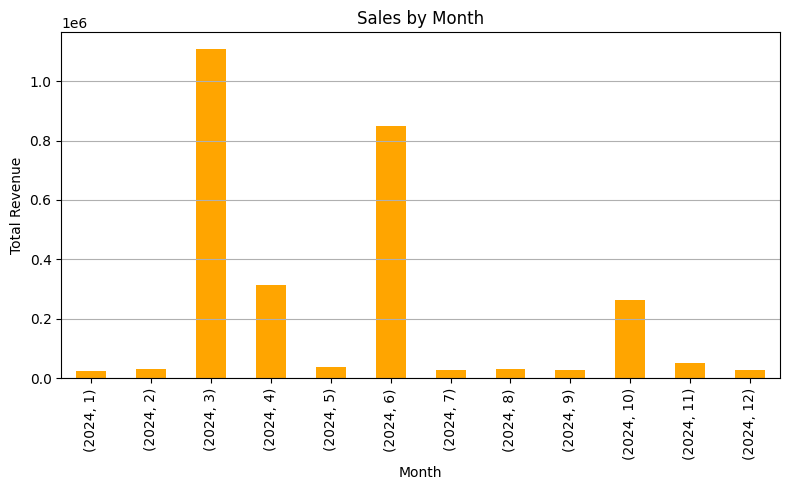

In [26]:
# === Plot 3: Sales by Month ===
orders_agg_df['total_revenue'].plot(kind='bar', color='orange', figsize=(8, 5))
plt.title("Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('image\\Sales_by_Month.png')
plt.show()

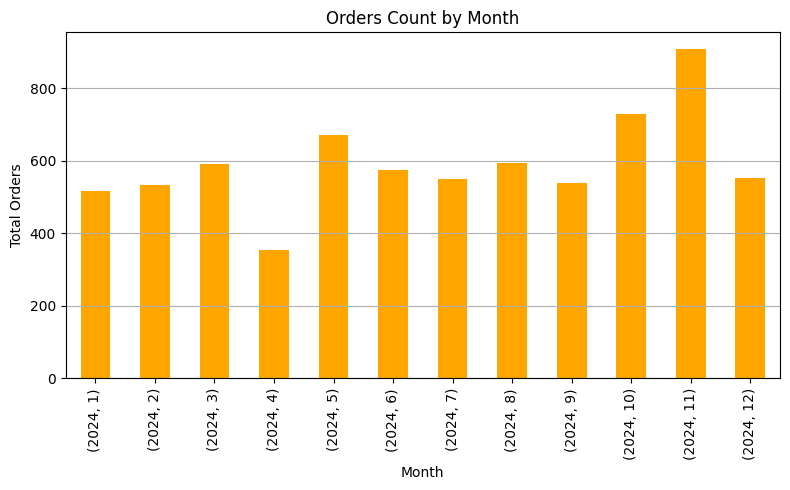

In [27]:
# === Plot 3: Sales by Month ===
orders_agg_df['total_orders'].plot(kind='bar', color='orange', figsize=(8, 5))
plt.title("Orders Count by Month")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('image\\Orders_Count_by_Month.png')
plt.show()

## Exercise
##### Find the Top 10 Best Selling Products based on the existing data and plot the Bar Chart.